In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [ ]:
!kaggle datasets download -d muhammeddalkran/catvnoncat

  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 246MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('catvnoncat.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import h5py

In [ ]:

train_dataset = h5py.File('/content/catvnoncat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/catvnoncat/test_catvnoncat.h5', "r")

In [ ]:
train_set_x = np.array(train_dataset['train_set_x'])
train_set_y = np.array(train_dataset['train_set_y'])
test_set_x = np.array(test_dataset['test_set_x'])
test_set_y = np.array(test_dataset['test_set_y'])
train_set_y=train_set_y.reshape(-1,1)
train_set_y=train_set_y.T
Y=train_set_y
test_set_y=test_set_y.reshape(-1,1)
test_set_y=test_set_y.T

classes = ["cat","not-cat"]  #CHANGE

print('Shape of train_set_x:', train_set_x.shape)
print('Shape of train_set_y:', Y.shape)
print('Shape of test_set_x:', test_set_x.shape)
print('Shape of test_set_y:', test_set_y.shape)

Shape of train_set_x: (209, 64, 64, 3)
Shape of train_set_y: (1, 209)
Shape of test_set_x: (50, 64, 64, 3)
Shape of test_set_y: (1, 50)


In [ ]:
# Sigmoid function
def sigmoid(z):
  z=s=1/(1+np.exp(-z))
  return z
# x=np.array([1,2,3])
# print(sigmoid(x))

In [ ]:
# Initialize parameters to zero
def initialize_para(dim):
  w=np.zeros((dim,1))
  b=0.0
  # params={
  #     "w":w,
  #     "b":b
  # }
  return w,b



In [ ]:
# Flatten the datasets
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T
X=train_set_x_flatten/255   #CHANGE
test_set_x_flatten = test_set_x_flatten /255 #CHANGE
print(X.shape[1])
print(test_set_x_flatten.shape)

209
(12288, 50)


In [ ]:
# Propagate
def propagate(w,b,X,Y):
  # w=params["w"]
  # b=params["b"]
  m=X.shape[1]
  Z=np.dot(w.T,X)+b
  A=sigmoid(Z)
  cost=(-1.0/m)*(np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))))
  dw = (1.0/m)*(np.dot(X,(A-Y).T))
  db = (1.0/m)*(np.sum(A-Y))

  grads={
      "dw":dw,
      "db":db
  }
  # params={
  #     "w":w,
  #     "b":b
  # }
  return grads,cost  #CHANGE
# w =  np.array([[1.], [2]])
# b = 1.5
# X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
# Y = np.array([[1, 1, 0]])
# print(propagate(params,X,Y))



In [ ]:
# optimization
def optimizer(w,b,X,Y,lr=0.009,num_iterations=500):
  costs=[]

  for i in range(num_iterations):

    grads,cost=propagate(w,b,X,Y)
    # w=params["w"]
    # b=params["b"]
    dw=grads["dw"]
    db=grads["db"]
    w=w-lr*dw
    b=b-lr*db
    if i%500==0:
      costs.append(cost)
  params={
      "w":w,
      "b":b
  }
  grads={
      "dw":dw,
      "db":db
  }
  return params,grads,costs


In [ ]:
# params, grads, costs = optimizer(params, X, Y, lr=0.009, num_iterations=500)

# print ("w = " + str(params["w"]))
# print ("b = " + str(params["b"]))
# print ("dw = " + str(grads["dw"]))
# print ("db = " + str(grads["db"]))
# print("Costs = " + str(costs))

In [ ]:
# predict
def predict(w,b,X):
  # w=params["w"]
  # b=params["b"]
  Y_predict=np.zeros((1,X.shape[1]))
  Z=np.dot(w.T,X)+b
  A=sigmoid(Z)
  for i in range(A.shape[1]):
    if A[0,i]<=0.5:
      Y_predict[0,i]=0
    else:
      Y_predict[0,i]=1
    # params={
    #     "w":w,
    #     "b":b
    # }
  return Y_predict

In [ ]:
# Merge all functions
def model(X_test, X_train, Y_test, Y_train, lr=0.009, num_iterations=500):

    w,b = initialize_para(X_train.shape[0])

    params,grads, costs = optimizer(w,b, X_train,Y_train, lr=0.009, num_iterations=500)  #change

    w = params["w"]
    b = params["b"]

    Y_predict_train = predict(w,b, X_train)
    Y_predict_test = predict(w,b, X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100))  #CHANGE
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))  #CHANGE

    result = {
        "costs": costs,
        "w": w,
        "b": b,
        "Y_predict_train": Y_predict_train,
        "Y_predict_test": Y_predict_test,
        "lr": lr,
        "num_iterations": num_iterations
    }

    return result


res = model(test_set_x_flatten, train_set_x_flatten, test_set_y,train_set_y, lr=0.009,
               num_iterations=500)
print(res)


<ipython-input-38-aea994262bee>:3: RuntimeWarning: overflow encountered in exp
  z=s=1/(1+np.exp(-z))
<ipython-input-41-fae5ab903602>:8: RuntimeWarning: divide by zero encountered in log
  cost=(-1.0/m)*(np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))))
<ipython-input-41-fae5ab903602>:8: RuntimeWarning: invalid value encountered in multiply
  cost=(-1.0/m)*(np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))))


train accuracy: 95.2153110047847 %
test accuracy: 74.0 %
{'costs': [0.6931471805599453], 'w': array([[ 1.89590389],
       [-4.55770071],
       [-2.10127847],
       ...,
       [-2.09592054],
       [-5.20282318],
       [ 4.06854387]]), 'b': 0.0072377754624978596, 'Y_predict_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0

In [ ]:
# from sklearn.metrics import accuracy_score


# Y_predict_test=res["Y_predict_test"]
# accuracy_score(test_set_y,Y_predict_test)


In [ ]:
import matplotlib.pyplot as plt
# costs = np.squeeze(res['costs'])
# plt.plot(costs)
# plt.ylabel('cost')
# plt.xlabel('iterations (per hundreds)')
# plt.title("Learning rate =" + str(res["lr"]))
# plt.show()

you predicted that it is a "not-cat" picture.
Test Accuracy: 74.00%


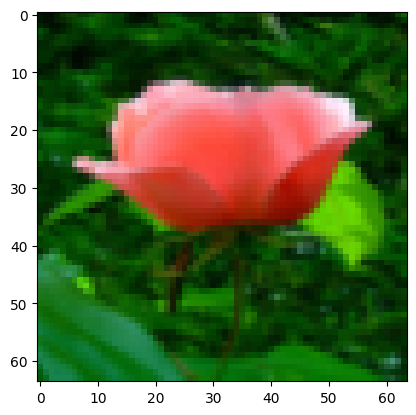

In [ ]:
from PIL import Image
from scipy import ndimage

index = 3
plt.imshow(X[:, index].reshape((64, 64, 3)))
print ("you predicted that it is a \"" + classes[int(res["Y_predict_test"][0, index])] + "\" picture.")

def accuracy(Y_pred, labels):

    Y_pred = np.squeeze(Y_pred)
    labels = np.squeeze(labels)

    accuracy = np.mean(Y_pred == labels)

    return accuracy

accuracy_value = accuracy(res["Y_predict_test"], test_set_y)

print("Test Accuracy: {:.2%}".format(accuracy_value))